In [1]:
import pandas as pd
from astropy import io,table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
import astropy.coordinates as coord
from astropy import units as u

In [33]:
plt.style.use(["dark_background"])
plt.rcParams['figure.figsize'] = 8.0,8.0
font = {"size"   :18}
plt.rc("font",**font)

In [3]:
giants = pd.DataFrame(pd.read_csv("giants.csv"))
giants["par/error"] = giants["parallax"]/giants["parallax_error"]

In [4]:
giants = giants.loc[giants["par/error"] >= 5]

In [5]:
giants["distance"] = 1/(giants["parallax"]) #kpc

In [6]:
pos = coord.SkyCoord(ra=giants["ra"][:]*u.degree,dec=giants["dec"][:]*u.degree,
                     distance=giants["distance"]*u.kpc,pm_ra_cosdec = giants["pmra"][:]*u.mas/u.yr,
                     pm_dec = giants["pmdec"][:]*u.mas/u.yr,
                     radial_velocity=giants["dr2_radial_velocity"][:]*u.km/u.s,
                     frame="icrs")

In [43]:
transformada = pos.transform_to(coord.Galactocentric(galcen_distance=8.25*u.kpc))

In [44]:
x = transformada.x.value
y = transformada.y.value
z = transformada.z.value
vx = transformada.v_x.value
vy = transformada.v_y.value
vz = transformada.v_z.value

In [49]:
x

array([-7.57325125, -7.91371224, -7.91065204, ..., -7.95429942,
       -5.87847162, -7.0166265 ])

In [45]:
r = np.sqrt(x**2+y**2)

In [46]:
phi = -np.arctan(y/x)

In [47]:
giants["vx"] = vx
giants["vy"] = vy; giants["vz"] = vz

In [48]:
#reducted = giants.loc[(giants["vx"].notna()) & (giants["vy"].notna()) & (giants["vz"].notna())]

In [24]:
vr = (x*vx+y*vy)/(np.sqrt(x**2+y**2))
vphi = (-x*vy+y*vx)/(np.sqrt(x**2+y**2))

In [25]:
giants["vr"] = vr; giants["vphi"] = vphi; giants["vz"] = vz

(-400.0, 400.0)

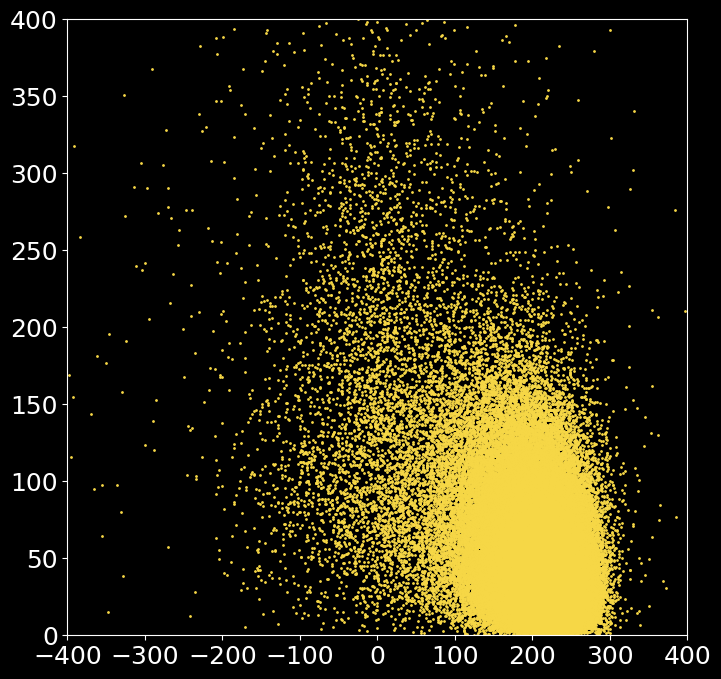

In [37]:
#h = plt.hist2d(giants["vphi"], np.sqrt(giants["vr"]**2+giants["vz"]**2), 
#               bins=500, cmin=5, norm=mplt.colors.PowerNorm(0.5), 
#               zorder=4,cmap=plt.cm.inferno)
plt.scatter(giants["vphi"],np.sqrt(giants["vr"]**2+giants["vz"]**2)
                                       ,s=1,color=mplt.cm.get_cmap("inferno")(0.9),zorder=0)
plt.ylim(0,400)
plt.xlim(-400,400)

(-400.0, 400.0)

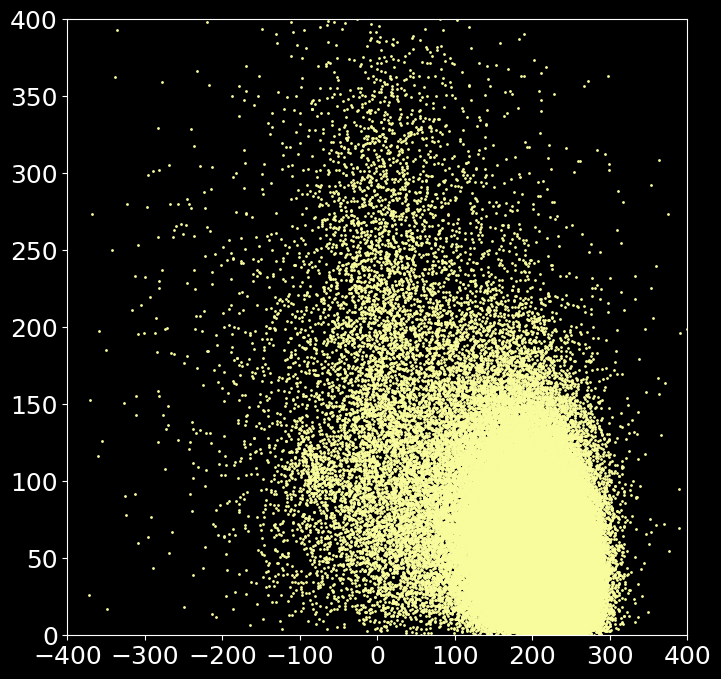

In [40]:
plt.scatter(giants["vT_Rzphi"],np.sqrt(giants["vR_Rzphi"]**2+giants["vz_Rzphi"]**2)
                                       ,s=1,color=mplt.cm.get_cmap("inferno")(0.99),zorder=0)
plt.ylim(0,400)
plt.xlim(-400,400)

(-400.0, 400.0)

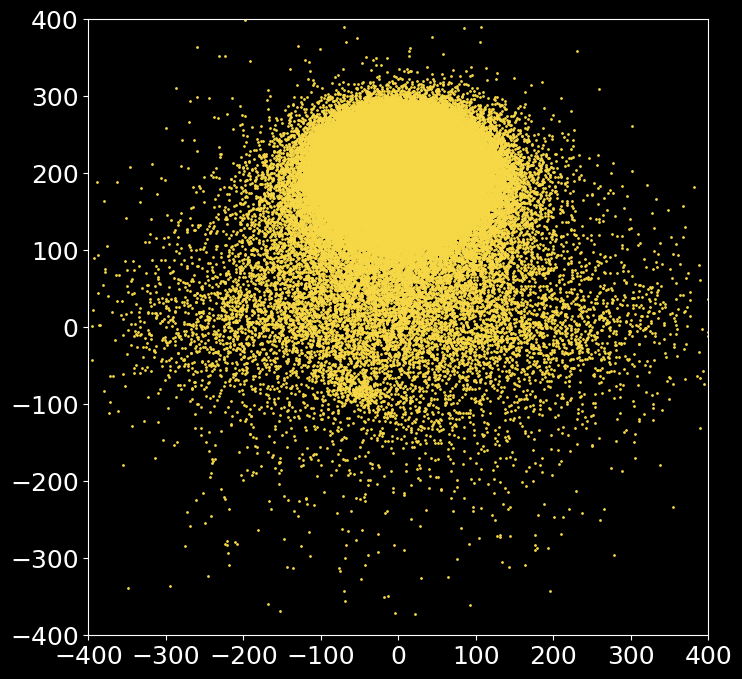

In [41]:
plt.scatter(giants["vR_Rzphi"],giants["vT_Rzphi"]
            ,s=1,color=mplt.cm.get_cmap("inferno")(0.9),zorder=0)
plt.ylim(-400,400)
plt.xlim(-400,400)

In [3]:
import numpy as np
np.sqrt(200**3)*0.35

989.9494936611665

In [28]:
(2e12)**(2/9)

541.454816418154

In [29]:
tdyn = np.sqrt(541**3)*0.35

In [30]:
tdyn

4404.168658498445

In [31]:
tdyn/8760

0.5027589792806445

In [32]:
2*(1/541)*(1/40000)*1e7

0.9242144177449169